<a href="https://colab.research.google.com/github/ptran217/fast.ai-lessons/blob/master/Lesson-02/Copy_of_lesson2_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *

In [0]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   321  100   321    0     0   1589      0 --:--:-- --:--:-- --:--:--  1597
Updating fastai...
Done.


In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [0]:
n=100

In [0]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.7150,  1.0000],
        [ 0.9244,  1.0000],
        [-0.0395,  1.0000],
        [ 0.4657,  1.0000],
        [ 0.6902,  1.0000]])

In [0]:
a = tensor(3.,2); a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n); y

tensor([ 4.3230,  5.1669,  2.1962,  4.2032,  4.7626,  3.6607,  0.5740,  4.7682,
         4.2006,  0.6137, -0.2278,  3.2385,  5.0956,  5.8518,  1.5195,  0.5563,
         5.2932,  2.5170,  0.0279,  3.2915,  3.9081,  3.2224,  0.8229,  4.9672,
         4.8972,  1.1678,  1.8159,  2.3212,  3.5579,  4.3656,  4.6787,  3.8424,
         2.6096, -0.1828,  5.4271,  0.6842,  2.5615,  1.4392,  4.5877,  4.1166,
         2.2175,  0.3237,  5.4915,  2.6320,  5.4828,  2.6181,  3.7885,  5.1057,
         0.3384,  0.8601,  3.6659,  0.3996,  5.3794,  3.2206,  1.8242,  1.3261,
         1.2832, -0.0865,  1.8387,  0.3317,  3.8560,  0.6864,  3.9257,  0.9842,
         1.2380,  5.3131,  1.7777,  2.1010,  2.9282,  1.7620,  3.0747,  0.2041,
         2.3330,  1.4234,  1.1108,  4.0785,  4.5290,  1.6619,  3.8151,  1.5413,
         2.5761,  3.5234,  1.4761,  3.1307,  4.1277,  3.6645, -0.3405,  4.2982,
         2.3473,  1.8681,  4.8976,  4.1643,  4.0481,  0.4215,  5.0162,  4.2243,
         2.2575,  4.4203, -0.2311,  3.17

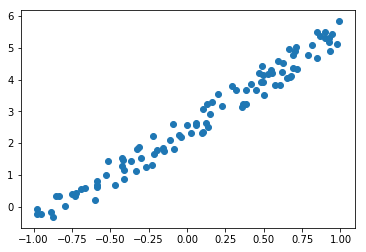

In [0]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [0]:
a = tensor(-1.,1)

In [0]:
y_hat = x@a
mse(y_hat, y)

tensor(8.6753)

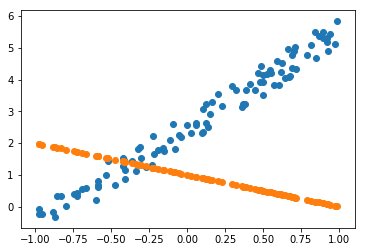

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [0]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [0]:
lr = 1e-1
for t in range(100): update()

tensor(8.6753, grad_fn=<MeanBackward0>)
tensor(1.3131, grad_fn=<MeanBackward0>)
tensor(0.4032, grad_fn=<MeanBackward0>)
tensor(0.1688, grad_fn=<MeanBackward0>)
tensor(0.1055, grad_fn=<MeanBackward0>)
tensor(0.0883, grad_fn=<MeanBackward0>)
tensor(0.0837, grad_fn=<MeanBackward0>)
tensor(0.0825, grad_fn=<MeanBackward0>)
tensor(0.0821, grad_fn=<MeanBackward0>)
tensor(0.0820, grad_fn=<MeanBackward0>)


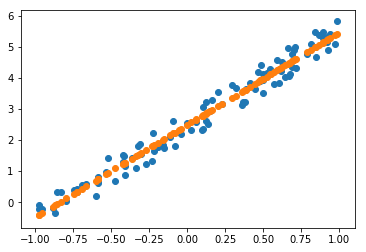

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [0]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.